In [1]:
#Purpose: Import all the necessary libraries required for the task.
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#load dataset
rotten_data=pd.read_csv('C:/Users/harry/Downloads/Rotten_Tomatoes_Movies3.csv')

In [4]:
#Purpose: Load your data into a DataFrame and take a look at the first few(5) rows.
rotten_data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,Fresh,89,27,74.0


In [5]:
# Check the general info of the dataset
rotten_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [6]:
## Check for missing values
rotten_data.isnull().sum() 

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [7]:
# Drop columns with excessive missing values
rotten_data = rotten_data.drop(columns=['critics_consensus'], errors='ignore')

In [8]:
# handling missing values
rotten_data['runtime_in_minutes'] = rotten_data['runtime_in_minutes'].fillna(rotten_data['runtime_in_minutes'].mean())
rotten_data['audience_rating'] = rotten_data['audience_rating'].fillna(rotten_data['audience_rating'].median())
rotten_data['movie_info'] = rotten_data['movie_info'].fillna('Unknown')
rotten_data['genre'] = rotten_data['genre'].fillna(rotten_data['genre'].mode()[0])
rotten_data['rating'] = rotten_data['rating'].fillna('Unknown')
rotten_data['in_theaters_date'] = rotten_data['in_theaters_date'].fillna('Unknown')
rotten_data['directors'] = rotten_data['directors'].fillna('Unknown')
rotten_data['writers'] = rotten_data['writers'].fillna('Unknown')
rotten_data['cast'] = rotten_data['cast'].fillna('Unknown')
rotten_data['studio_name'] = rotten_data['studio_name'].fillna('Unknown')
rotten_data['on_streaming_date'] = rotten_data['on_streaming_date'].fillna(rotten_data['on_streaming_date'].mode()[0])

In [9]:
# Check for missing values
print(rotten_data.isnull().sum())

movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64


In [10]:
#Number of directors in each movie
rotten_data['num_directors'] = rotten_data['directors'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of directors
rotten_data[rotten_data["num_directors"] == rotten_data["num_directors"].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors
2184,ABCs of Death 2,ABC's OF DEATH 2 is the follow-up to the most ...,NR,Horror,"Ahron Keshales, Navot Papushado, Bill Plympton...",Unknown,"Beatrice Dalle, Victoria Broom, Andy Nyman, Ma...",10/31/2014,2/3/2015,125.0,Magnet Releasing,Fresh,73,33,39.0,31
13653,The ABCs of Death,Twenty-six directors. Twenty-six ways to die. ...,R,"Horror, Mystery & Suspense","Christopher Smith (VIII), Angela Bettis, Simon...",Unknown,"Ingrid Bolso Berdal, Neil Maskell, Kyra Zagors...",3/8/2013,5/21/2013,129.0,Magnolia Pictures,Rotten,37,68,23.0,31


In [11]:
#Number of authors in each movie
rotten_data['num_writer'] = rotten_data['writers'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of authors
rotten_data[rotten_data["num_writer"] == rotten_data["num_writer"].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writer
16618,Ziegfeld Follies,"In this film, we meet the legendary showman Fl...",NR,"Classics, Musical & Performing Arts","Vincente Minnelli, Lemuel Ayers, Charles Walte...","Robert Lewis, Lemuel Ayers, Charles Walters, H...","Fred Astaire, Judy Garland, Gene Kelly, Willia...",Unknown,4/25/2006,109.0,MGM Home Entertainment,Fresh,67,9,59.0,7,34


In [12]:
#Number of cast in each movie
rotten_data['num_actors'] = rotten_data['cast'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of cast
rotten_data[rotten_data["num_actors"] == rotten_data["num_actors"].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writer,num_actors
912,Malcolm X,Writer-director Spike Lee's epic portrayal of ...,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",11/18/1992,1/18/2000,201.0,Warner Bros.,Certified Fresh,88,57,91.0,1,2,306


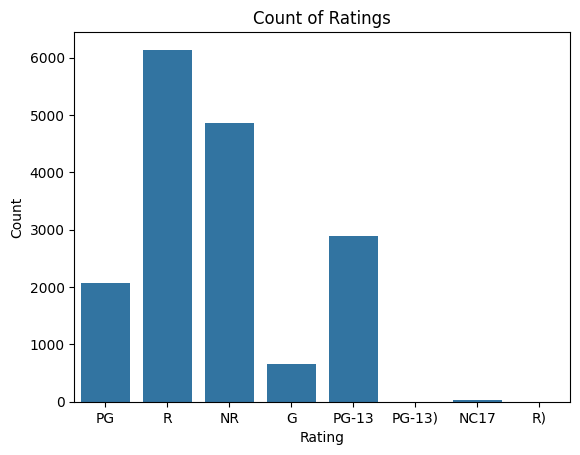

In [13]:
# Countplot to visualize the count of each rating
sns.countplot(x='rating', data=rotten_data)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show() 

<Axes: >

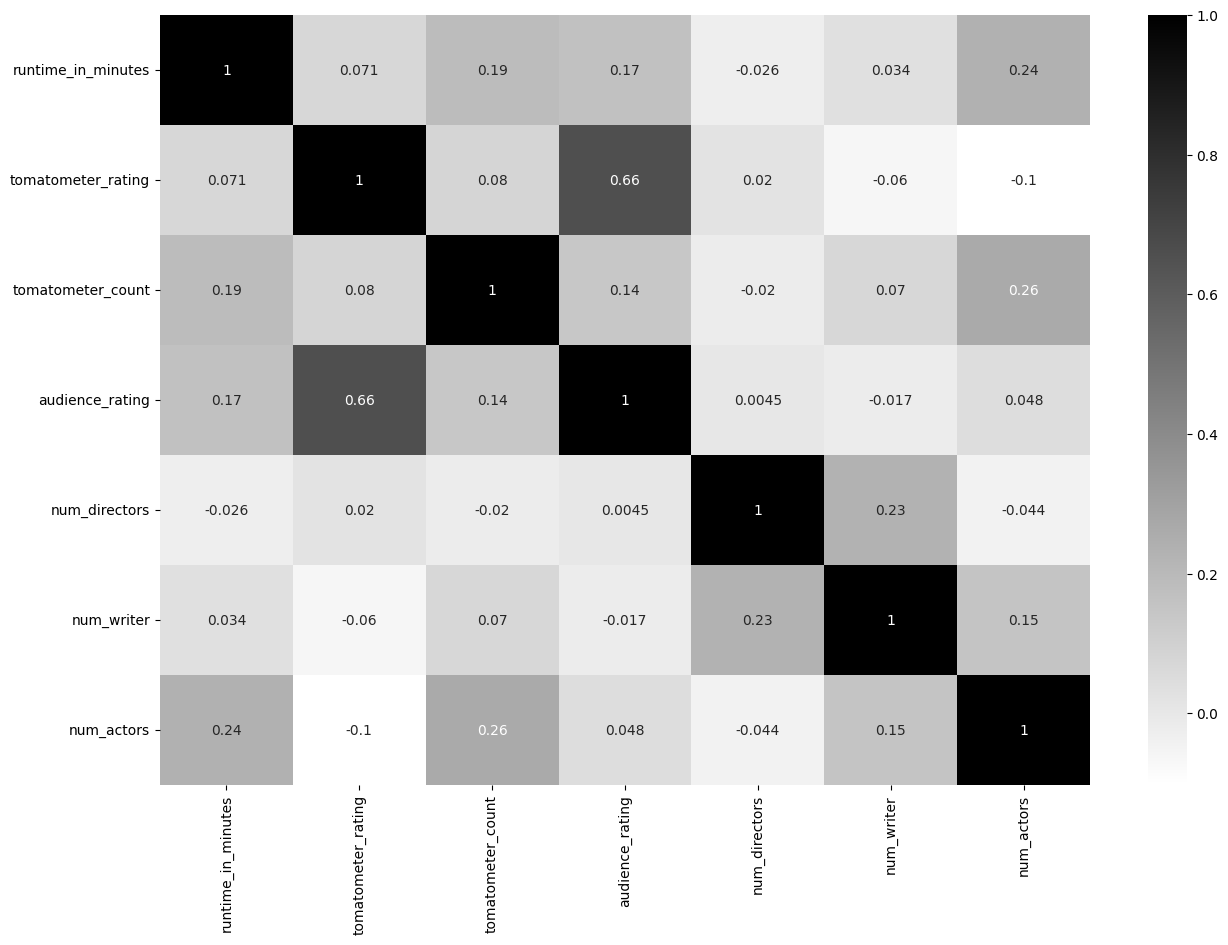

In [14]:
## Select only the numeric columns and calculate the correlation matrix
corr = rotten_data.select_dtypes('number').corr()
# Set the size of the plot
plt.figure(figsize=(15, 10))
# Plot the heatmap with the correlation matrix
sns.heatmap(corr, annot=True, cmap='binary')

In [15]:
#Correlation with the target value 'audience rating'
rotten_data.select_dtypes('number').corr()['audience_rating'].sort_values(ascending=False)

audience_rating       1.000000
tomatometer_rating    0.655457
runtime_in_minutes    0.165927
tomatometer_count     0.139727
num_actors            0.047837
num_directors         0.004538
num_writer           -0.016859
Name: audience_rating, dtype: float64

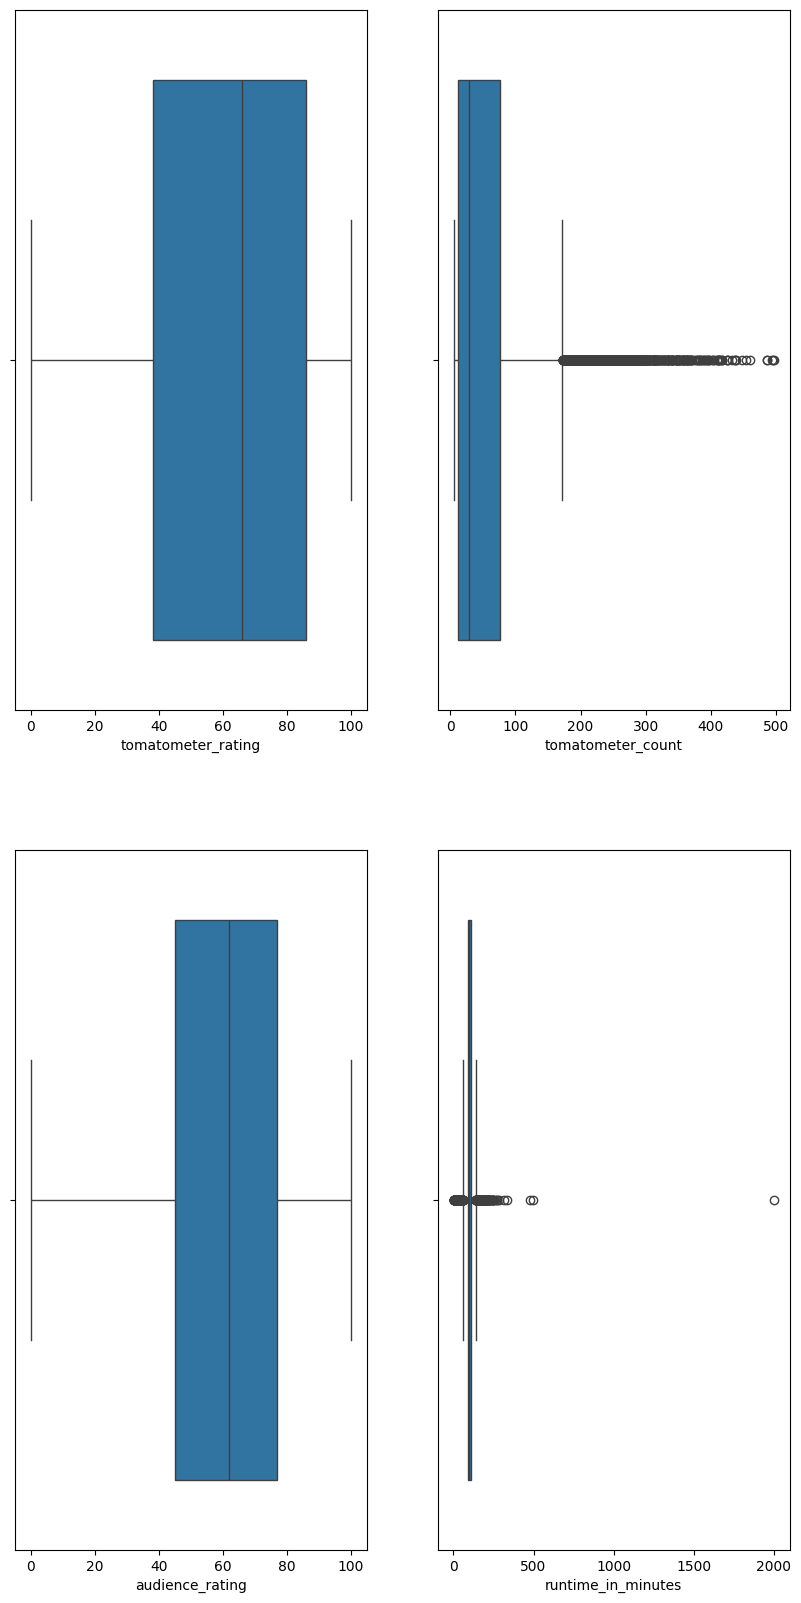

In [17]:
#Checking for OUTLIERS
box_col = ['tomatometer_rating', 'tomatometer_count', 'audience_rating', 'runtime_in_minutes']
fig, ax = plt.subplots(2, 2, figsize=(10, 20))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=rotten_data, x=value, ax=ax[index])

In [18]:
# Calculate Q1 and Q3 for the 'tomatometer_count' column
Q1 = rotten_data['tomatometer_count'].quantile(0.25)
Q3 = rotten_data['tomatometer_count'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Print the IQR
print(IQR)

64.0


In [19]:
# Calculate the lower and upper bounds for outliers
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR
# Print the lower and upper bounds
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 0
Upper Bound: 172.0


In [20]:
# Remove outliers from the 'tomatometer_count' column
rotten_data_cleaned = rotten_data[(rotten_data['tomatometer_count'] >= lower_bound) & (rotten_data['tomatometer_count'] <= upper_bound)]
# Print the original and cleaned data shapes
print("Original Data Shape:", rotten_data.shape)
print("Cleaned Data Shape:", rotten_data_cleaned.shape)

Original Data Shape: (16638, 18)
Cleaned Data Shape: (15399, 18)


In [21]:
# Display the first few rows of the cleaned data
rotten_data_cleaned.head()

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writer,num_actors
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,Rotten,49,144,53.0,1,1,87
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,1,1,8
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,Fresh,68,22,53.0,1,1,46
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0,1,1,16
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,Fresh,89,27,74.0,1,1,16


tomatometer_status
Rotten             7233
Fresh              6448
Certified Fresh    2957
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Fresh, Certified Fresh and Rotten Movies')

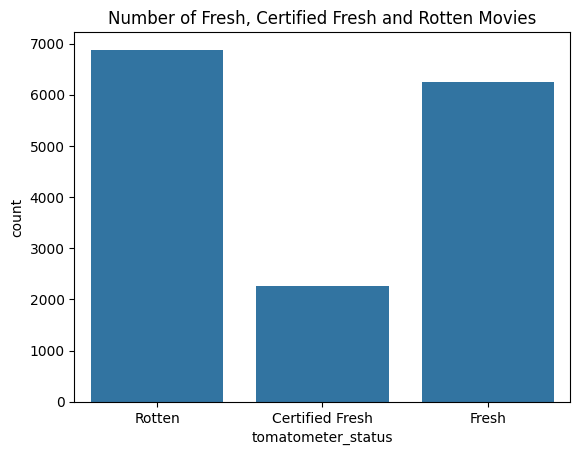

In [31]:
#Number of Fresh, Certified Fresh and Rotten Movies
print(rotten_data['tomatometer_status'].value_counts())
sns.countplot(data=rotten_data_cleaned, x='tomatometer_status')
plt.title('Number of Fresh, Certified Fresh and Rotten Movies') 

In [32]:
#Replacing tomatometer_status with numeric values
rotten_data_cleaned['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified Fresh'], [0, 1, 2], inplace=True)

C:\Users\harry\AppData\Local\Temp\ipykernel_21436\3113361044.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rotten_data_cleaned['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified Fresh'], [0, 1, 2], inplace=True)
C:\Users\harry\AppData\Local\Temp\ipykernel_21436\3113361044.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

In [33]:
# Display the count of each unique value in the 'tomatometer_status' column
rotten_data_cleaned['tomatometer_status'].value_counts() 

tomatometer_status
0    6879
1    6252
2    2268
Name: count, dtype: int64

In [39]:
label_encoder = LabelEncoder()
# Ensure there are no missing values in the 'genre' and 'rating' columns of 'rotten_data_cleaned'
rotten_data_cleaned['genre_encoded'] = label_encoder.fit_transform(rotten_data_cleaned['genre'])
rotten_data_cleaned['rating_encoded'] = label_encoder.fit_transform(rotten_data_cleaned['rating'])
# Now check if it works without the length mismatch error
print(rotten_data_cleaned[['genre', 'genre_encoded', 'rating', 'rating_encoded']].head())


                                               genre  genre_encoded rating  \
0  Action & Adventure, Comedy, Drama, Science Fic...            213     PG   
1                                             Comedy            740      R   
2                                    Comedy, Romance            847      R   
3                                    Classics, Drama            677     NR   
4           Action & Adventure, Drama, Kids & Family            280      G   

   rating_encoded  
0               3  
1               6  
2               6  
3               2  
4               0  


C:\Users\harry\AppData\Local\Temp\ipykernel_21436\893957587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_data_cleaned['genre_encoded'] = label_encoder.fit_transform(rotten_data_cleaned['genre'])
C:\Users\harry\AppData\Local\Temp\ipykernel_21436\893957587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_data_cleaned['rating_encoded'] = label_encoder.fit_transform(rotten_data_cleaned['rating'])


In [40]:
rotten_data_cleaned.head()

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writer,num_actors,genre_encoded,rating_encoded
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,0,49,144,53.0,1,1,87,213,3
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,2,86,140,64.0,1,1,8,740,6
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,1,68,22,53.0,1,1,46,847,6
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,2,100,51,97.0,1,1,16,677,2
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,1,89,27,74.0,1,1,16,280,0


In [41]:
# Check for negative values in rating-related columns
negative_values = rotten_data_cleaned[['tomatometer_rating', 'audience_rating', 'rating_encoded']].lt(0).sum()
print("Negative values count:")
print(negative_values)
# Check for outliers in `num_*` columns
rotten_data_cleaned[['num_directors', 'num_writer', 'num_actors']].describe()

Negative values count:
tomatometer_rating    0
audience_rating       0
rating_encoded        0
dtype: int64


,num_directors,num_writer,num_actors
count,15399.000000,15399.000000,15399.000000
mean,1.141503,1.714137,24.112540
std,0.670315,1.137502,19.662234
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,9.000000
50%,1.000000,1.000000,19.000000
75%,1.000000,2.000000,34.000000
max,31.000000,34.000000,306.000000


In [44]:
# Identify the numeric columns in your cleaned DataFrame
numeric_columns = rotten_data_cleaned.select_dtypes(include='number').columns

# Use .loc to modify the DataFrame properly
rotten_data_cleaned.loc[:, numeric_columns] = rotten_data_cleaned[numeric_columns].fillna(rotten_data_cleaned[numeric_columns].median())

# Check the first few rows of the cleaned data
rotten_data_cleaned.head()


,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,num_directors,num_writer,num_actors,genre_encoded,rating_encoded
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2/12/2010,6/29/2010,83.0,20th Century Fox,0,49,144,53.0,1,1,87,213,3
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",4/30/2010,10/19/2010,90.0,Sony Pictures Classics,2,86,140,64.0,1,1,8,740,6
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",10/5/1979,8/27/1997,118.0,Waner Bros.,1,68,22,53.0,1,1,46,847,6
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",4/13/1957,3/6/2001,95.0,Criterion Collection,2,100,51,97.0,1,1,16,677,2
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1/1/1954,5/20/2003,127.0,Disney,1,89,27,74.0,1,1,16,280,0


In [46]:
rotten_data_cleaned.columns

Index(['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers',
       'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
       'studio_name', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating', 'num_directors', 'num_writer',
       'num_actors', 'genre_encoded', 'rating_encoded'],
      dtype='object')

In [47]:
# Concatenate the selected features into the 'feature' DataFrame
feature = pd.concat([rotten_data_cleaned[['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count','genre_encoded','rating_encoded', 'tomatometer_status', 'audience_rating', 'num_directors', 'num_writer', 'num_actors']]], axis=1)

In [48]:
#Displaying the few rows and columns of feature
feature.head()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,genre_encoded,rating_encoded,tomatometer_status,audience_rating,num_directors,num_writer,num_actors
0,83.0,49,144,213,3,0,53.0,1,1,87
1,90.0,86,140,740,6,2,64.0,1,1,8
2,118.0,68,22,847,6,1,53.0,1,1,46
3,95.0,100,51,677,2,2,97.0,1,1,16
4,127.0,89,27,280,0,1,74.0,1,1,16


In [49]:
#data standardization
scaler = StandardScaler()
# Fit and transform the feature data
feature_scale = scaler.fit_transform(feature)
feature_scale


array([[-0.73169057, -0.37065884,  2.40501309, ..., -0.21110562,
        -0.62783237,  3.19849218],
       [-0.45187544,  0.90937519,  2.31031686, ..., -0.21110562,
        -0.62783237, -0.81949298],
       [ 0.6673851 ,  0.28665593, -0.48322198, ..., -0.21110562,
        -0.62783237,  1.11320874],
       ...,
       [ 1.62675128,  0.63261107, -0.79098473, ..., -0.21110562,
        -0.62783237, -0.66691127],
       [ 1.50683051,  1.22073482, -0.50689603, ...,  1.28077849,
         0.25131564,  0.45202131],
       [ 0.62741151, -0.09389473, -0.83833284, ..., -0.21110562,
         0.25131564,  0.24857902]], shape=(15399, 10))

In [50]:
#splitting the data into training and tesing
X_train, X_test, y_train, y_test = train_test_split(feature_scale, rotten_data_cleaned['audience_rating'], test_size=0.2, random_state=42) 

In [51]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))  # Model step: RandomForestClassifier
])

In [53]:
# Train the model with the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [54]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [55]:
# Print Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8646103896103896
Classification Report:
               precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         3
        11.0       1.00      0.50      0.67         2
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         2
        14.0       0.20      0.25      0.22         4
        15.0       0.33      0.33      0.33         6
        16.0       0.67      0.22      0.33         9
        17.0       0.30      0.38      0.33         8
        18.0       0.27      0.23      0.25        13
        19.0       0.33      0.33      0.33         9
        20.0       0.23      0.23      0.23        13
        21.0       0.56      0.38      0.45        13
        22.0       0.57      0.72      0.63        18
        23.0       0.58     

C:\Users\harry\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harry\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harry\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo